<a href="https://colab.research.google.com/github/bhatiaparteek/ml_with_python/blob/main/Chapter_11_Classifiers/chapter_11_implementation_of_classifiers_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifier – I (Decision Tree Classifier)

1.1: Importing the Libraries

In [ ]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.2: Loading the Dataset

In [ ]:
from google.colab import files

# Upload the file from your local system
uploaded = files.upload()

Saving Alexa_dataset.csv to Alexa_dataset (1).csv


In [ ]:
#Loading the Dataset
Dataset =  pd.read_csv('Alexa_dataset.csv')
X = Dataset.iloc[:, [2, 3]].values
y = Dataset.iloc[:, 4].values
print(X)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

1.3: Splitting the dataset into the Training set and Test set

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

1.4: Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)
print(X_train)
print(X_test)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

1.5: Fitting Decision Tree Classification to the Training set

In [ ]:
# Classifier – I (Decision Tree Classifier)
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier( criterion =  'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

1.6:	Predicting the Decision Tree Classifier

In [ ]:
# Predicting the Decision Tree Classifier
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


1.7: Making the confusion matrix

In [ ]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


1.8: Performance metrics

In [ ]:
#Performance metrics
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is', accuracy)

#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision is ', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall is ', recall)

Accuracy is 0.93
Precision is  0.8787878787878788
Recall is  0.90625


1.9: Function definition for visualization of results

In [ ]:
# Function definition for visualization of results
def Visualizer(argument1, arguement2):
  from matplotlib.colors import ListedColormap
  X_set, y_set = argument1, arguement2
  X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop
  =X_set[:,0].max()+1, step=0.01),
  np.arange(start=X_set[:, 1].min() - 1, stop =
  X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),
  X2.ravel()]).T).reshape(X1.shape),
  alpha= 0.75, cmap = ListedColormap(('red', 'green')))

  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label=j)
  plt.xlabel('Age')
  plt.ylabel('Minutes_of_Music_Consumed')
  plt.legend()
  plt.show()

1.10: Visualizing the Training set results

<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


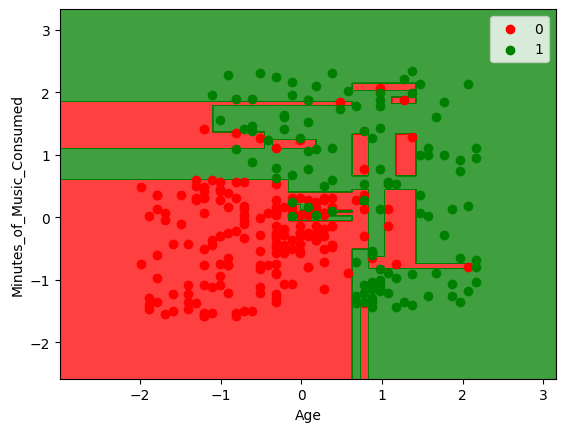

In [ ]:
#Visualizing the Training set results
Visualizer(X_train, y_train)

1.11: Visualizing the Test set results

<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


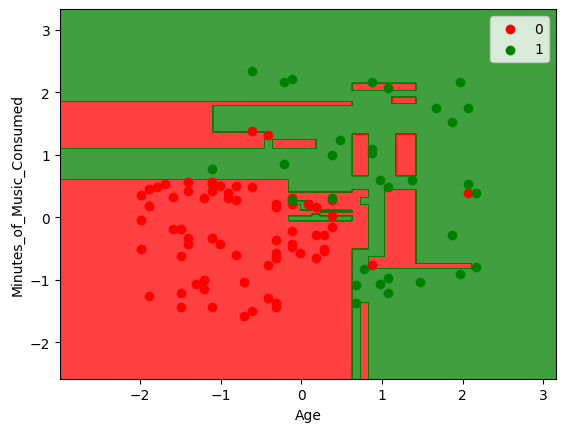

In [ ]:
#Visualizing the Test set results
Visualizer(X_test, y_test)

# Classifier – 2 (Random Forest Classifier)

2.1: Importing the Libraries

In [ ]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2.2: Loading the Dataset

In [ ]:
#Loading the Dataset
Dataset =  pd.read_csv('Alexa_dataset.csv')
X = Dataset.iloc[:, [2, 3]].values
y = Dataset.iloc[:, 4].values

2.3: Splitting the dataset into the Training set and Test set

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

2.4: Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

2.5: Fitting Random Forest Classification to the Training set

In [ ]:
# Classifier – II (Random Forest Classifier)
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion =  'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

2.6: Predicting the Test set results

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


2.7: Making the confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  5]
 [ 4 28]]


2.8: Performance metrics

In [ ]:
#Performance metrics
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is ', accuracy)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision is ', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall is ', recall)

Accuracy is  0.91
Precision is  0.8484848484848485
Recall is  0.875


2.9: Visualizing the Training set results


<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


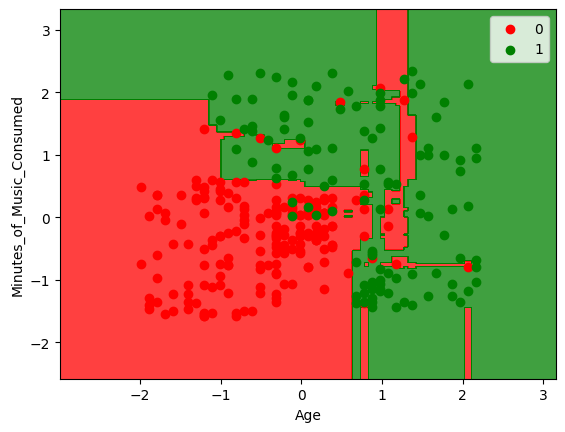

In [ ]:
#Visualizing the Training set results
Visualizer(X_train, y_train)

2.10: Visualizing the Test set results

<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


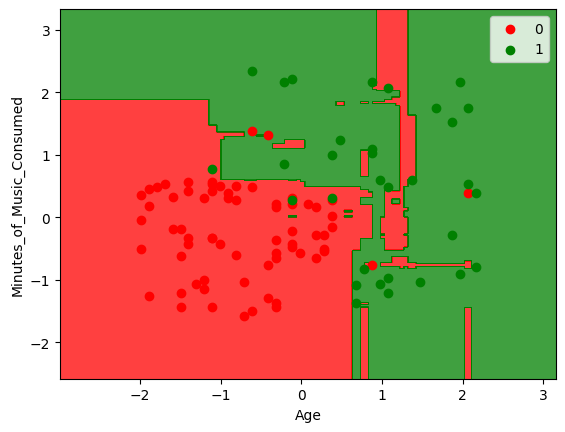

In [ ]:
#Visualizing the Test set results
Visualizer(X_test, y_test)

# Classifier – 3 (Naïve Bayes Classifier)

3.1: Importing the Libraries

In [ ]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

3.2: Loading the Dataset

In [ ]:
#Loading the Dataset
Dataset =  pd.read_csv('Alexa_dataset.csv')
X = Dataset.iloc[:, [2, 3]].values
y = Dataset.iloc[:, 4].values

3.3: Splitting the dataset into the Training set and Test set

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

3.4: Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

3.5: Fitting Naive Bayes to the Training set

In [ ]:
# Classifier – III  (Naïve Bayes Classifier)
# Fitting Naïve Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

3.6: Predicting the Test set results

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


3.7: Making the confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


3.8: Performance metrics

In [ ]:
#Performance metrics
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is ', accuracy)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision is ', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall is ', recall)

Accuracy is  0.9
Precision is  0.8928571428571429
Recall is  0.78125


3.9: Visualizing the Training set results


<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


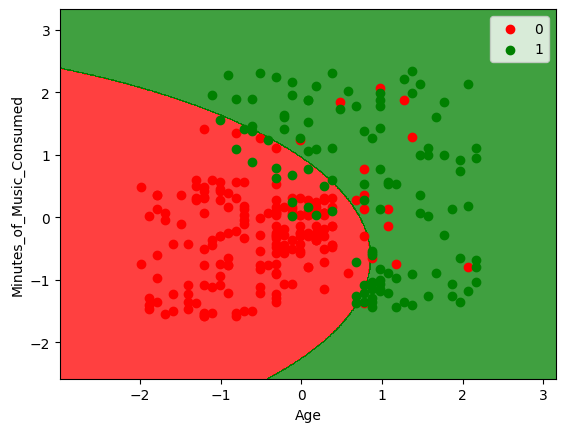

In [ ]:
#Visualizing the Training set results
Visualizer(X_train, y_train)

3.10: Visualizing the Test set results

<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


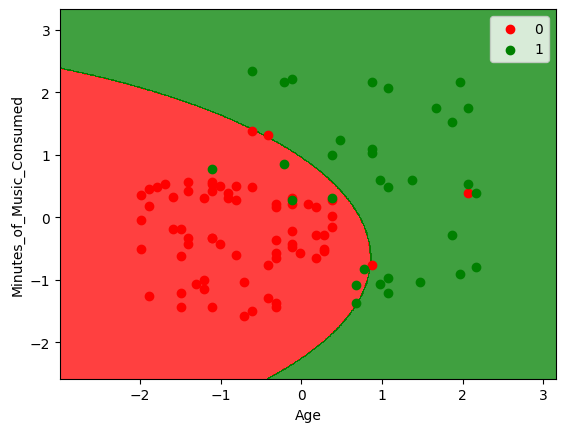

In [ ]:
#Visualizing the Test set results
Visualizer(X_test, y_test)

# Classifier – 4 (K-Nearest Neighbors)

4.1: Importing the Libraries

In [ ]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

4.2: Loading the Dataset

In [ ]:
#Loading the Dataset
Dataset =  pd.read_csv('Alexa_dataset.csv')
X = Dataset.iloc[:, [2, 3]].values
y = Dataset.iloc[:, 4].values

4.3: Splitting the dataset into the Training set and Test set

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

4.4: Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

4.5: Fitting KNN to the Training set

In [ ]:
# Classifier – IV  (KNN)
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier( n_neighbors = 5, metric =  'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

2.6: Predicting the Test set results

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


4.7: Making the confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


4.8: Performance metrics

In [ ]:
#Performance metrics
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is ', accuracy)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision is ', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall is ', recall)

Accuracy is  0.93
Precision is  0.8787878787878788
Recall is  0.90625


4.9: Visualizing the Training set results


<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


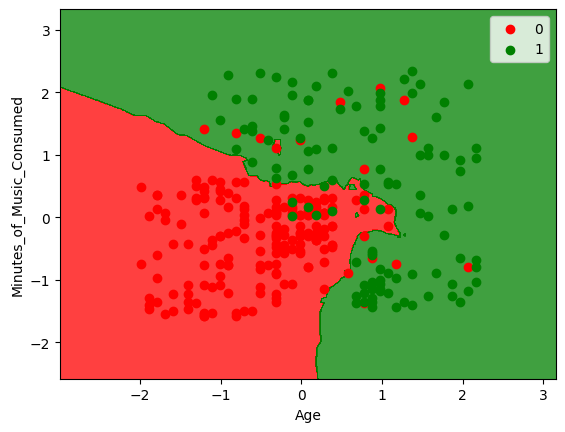

In [ ]:
#Visualizing the Training set results
Visualizer(X_train, y_train)

4.10: Visualizing the Test set results

<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


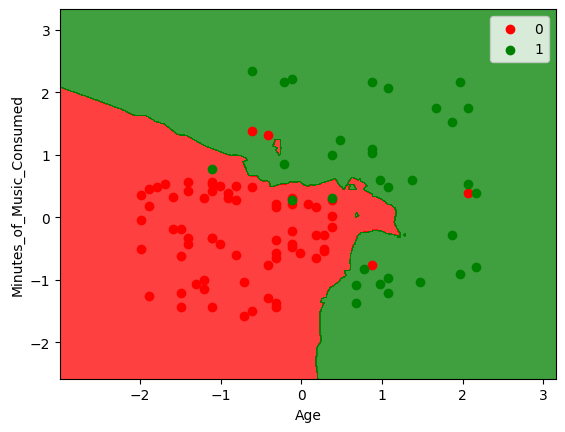

In [ ]:
#Visualizing the Test set results
Visualizer(X_test, y_test)

# Classifier – 5 (Logistic Regression)

5.1: Importing the Libraries

In [ ]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

5.2: Loading the Dataset

In [ ]:
#Loading the Dataset
Dataset =  pd.read_csv('Alexa_dataset.csv')
X = Dataset.iloc[:, [2, 3]].values
y = Dataset.iloc[:, 4].values

5.3: Splitting the dataset into the Training set and Test set

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

5.4: Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

5.5: Fitting LR to the Training set

In [ ]:
# Classifier – V (Logistic Regression)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

5.6: Predicting the Test set results

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


5.7: Making the confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


5.8: Performance metrics

In [ ]:
#Performance metrics
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is ', accuracy)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision is ', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall is ', recall)

Accuracy is  0.89
Precision is  0.8888888888888888
Recall is  0.75


5.9: Visualizing the Training set results


<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


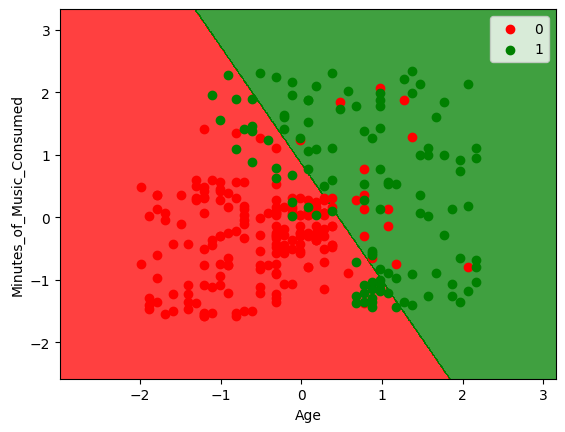

In [ ]:
#Visualizing the Training set results
Visualizer(X_train, y_train)

5.10: Visualizing the Test set results

<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


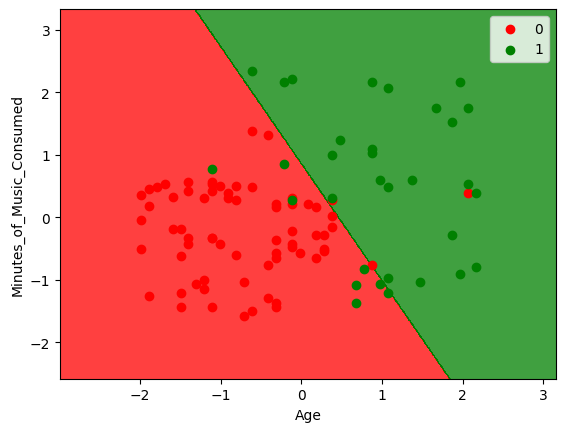

In [ ]:
#Visualizing the Test set results
Visualizer(X_test, y_test)

# Classifier – 6 (SVM Linear)

6.1: Importing the Libraries

In [ ]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

6.2: Loading the Dataset

In [ ]:
#Loading the Dataset
Dataset =  pd.read_csv('Alexa_dataset.csv')
X = Dataset.iloc[:, [2, 3]].values
y = Dataset.iloc[:, 4].values

6.3: Splitting the dataset into the Training set and Test set

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

6.4: Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

6.5: Fitting SVM (Linear) to the Training set

In [ ]:
# Classifier –  VI (SVM - Linear)
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC( kernel =  'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

6.6: Predicting the Test set results

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


6.7: Making the confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


6.8: Performance metrics

In [ ]:
#Performance metrics
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is ', accuracy)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision is ', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall is ', recall)

Accuracy is  0.9
Precision is  0.9230769230769231
Recall is  0.75


6.9: Visualizing the Training set results


<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


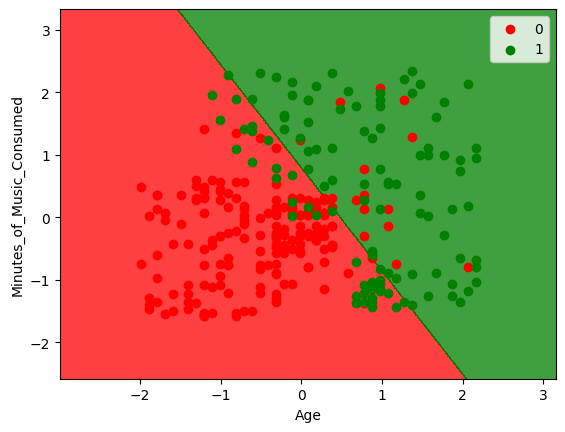

In [ ]:
#Visualizing the Training set results
Visualizer(X_train, y_train)

6.10: Visualizing the Test set results

<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


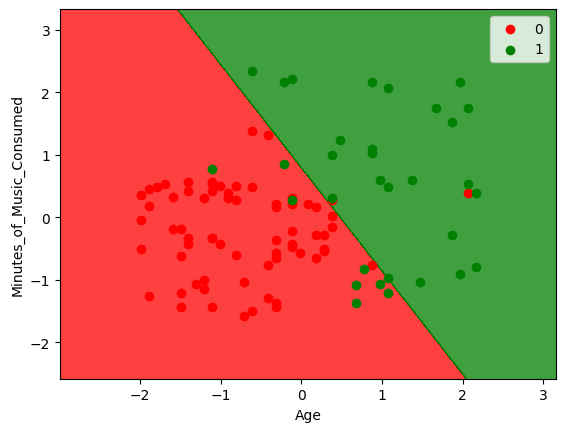

In [ ]:
#Visualizing the Test set results
Visualizer(X_test, y_test)

# Classifier – 7 (SVM Non-Linear)

7.1: Importing the Libraries

In [ ]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

7.2: Loading the Dataset

In [ ]:
#Loading the Dataset
Dataset =  pd.read_csv('Alexa_dataset.csv')
X = Dataset.iloc[:, [2, 3]].values
y = Dataset.iloc[:, 4].values

7.3: Splitting the dataset into the Training set and Test set

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

7.4: Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

7.5: Fitting SVM (Non - Linear) to the Training set

In [ ]:
# Classifier – VII (Non-Linear SVM)
# Fitting Non-Linear SVM to the Training set
from sklearn.svm import SVC
classifier = SVC (kernel =  'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

7.6: Predicting the Test set results

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


7.7: Making the confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


7.8: Performance metrics

In [ ]:
#Performance metrics
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is ', accuracy)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision is ', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall is ', recall)

Accuracy is  0.93
Precision is  0.8787878787878788
Recall is  0.90625


7.9: Visualizing the Training set results


<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


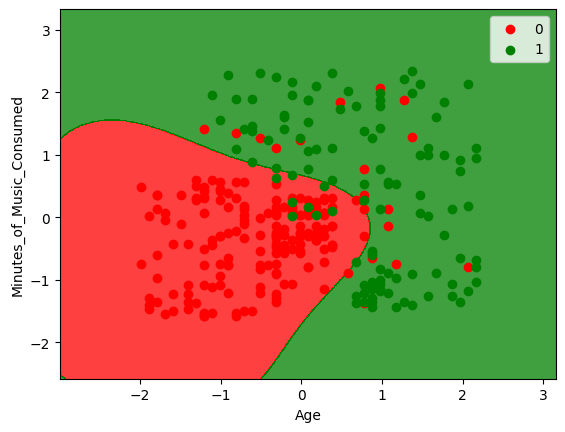

In [ ]:
#Visualizing the Training set results
Visualizer(X_train, y_train)

7.10: Visualizing the Test set results

<ipython-input-25-d8f9634ca23c>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


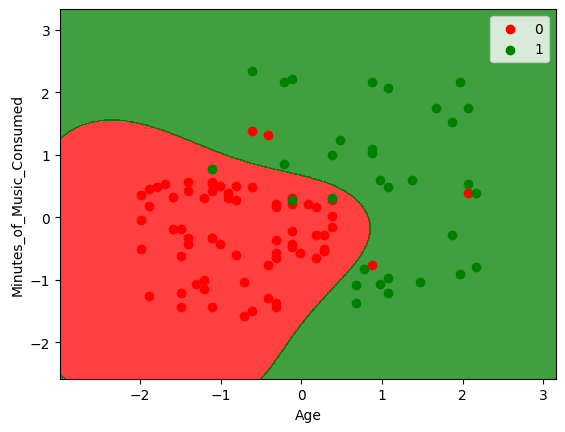

In [ ]:
#Visualizing the Test set results
Visualizer(X_test, y_test)